## This notebook is to create the planner dataset .csv and visualize the model's decision boundary and loss curve

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import os
import csv


Defining the function for creating the different datasets

In [2]:
N = 400 # N is the number of different points in dataset

def load_extra_datasets():  
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.3, noise=.09,random_state=1)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2,random_state=1)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=1)
    return noisy_circles, noisy_moons, gaussian_quantiles

Defining the plot function to visiualize the genereated points

In [3]:
def visualize_dataset(X,Y):
    plt.scatter(X[:,0], X[:,1], c=Y, s=30, cmap=plt.cm.Spectral)

Generating first dataset that is circles

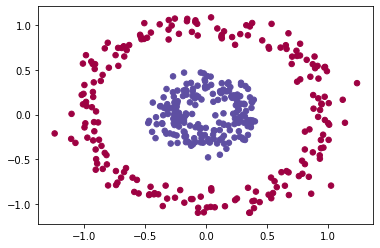

In [4]:
X_CIRCLES,Y_CIRCLES  = load_extra_datasets()[0]
visualize_dataset(X_CIRCLES,Y_CIRCLES)

Generating the second dataset of noisy moons

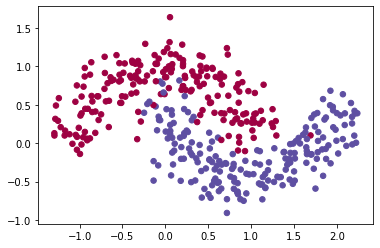

In [5]:
X_MOONS,Y_MOONS  = load_extra_datasets()[1]
visualize_dataset(X_MOONS,Y_MOONS)

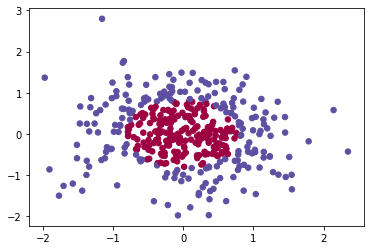

In [6]:
X_GAUS,Y_GAUS  = load_extra_datasets()[2]
visualize_dataset(X_GAUS,Y_GAUS)

Flower dataset 

In [7]:
def load_flower_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X, Y

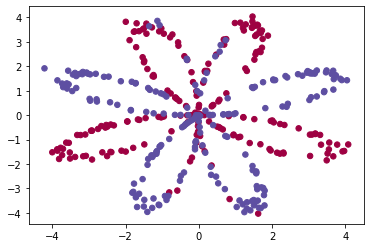

In [8]:
X_FLOWERS, Y_FLOWERS = load_flower_dataset()
plt.scatter(X_FLOWERS[:,0], X_FLOWERS[:,1], c=Y_FLOWERS, s=30, cmap=plt.cm.Spectral)

### Now saving all the generated points to csv

Saving X_CIRCLES and Y_CIRCLES to csv

In [10]:
dir = 'CIRCLES/'
os.makedirs(os.path.dirname(dir), exist_ok=True)

print("Data points in train set of circles are",X_CIRCLES.shape[0])

with open(dir+"X_TRAIN_CIRCLES.csv",'w') as f:
  for x in X_CIRCLES:
    line = str(x[0])+","+str(x[1])+"\n"
    f.write(line)  
  
with open(dir+"Y_TRAIN_CIRCLES.csv",'w') as f:
  for y in Y_CIRCLES:
    line = str(y)+"\n"
    f.write(line)  
  

Data points in train set of circles are 400


Saving X_MOONS and Y_MOONS to csv

In [11]:
dir = 'MOONS/'
os.makedirs(os.path.dirname(dir), exist_ok=True)

with open(dir+"X_TRAIN_MOONS.csv",'w') as f:
  for x in X_MOONS:
    line = str(x[0])+","+str(x[1])+"\n"
    f.write(line)  

print("Data points in train set of Moons are",X_MOONS.shape[0])

with open(dir+"Y_TRAIN_MOONS.csv",'w') as f:
  for y in Y_MOONS:
    line = str(y)+"\n"
    f.write(line)  

Data points in train set of Moons are 400


Saving X_GAUS and Y_GAUS to csv

In [12]:
dir = 'GAUS/'
os.makedirs(os.path.dirname(dir), exist_ok=True)

with open(dir+"X_TRAIN_GAUS.csv",'w') as f:
  for x in X_GAUS:
    line = str(x[0])+","+str(x[1])+"\n"
    f.write(line)  
print("Data points in train set of Gaus are",X_GAUS.shape[0])
with open(dir+"Y_TRAIN_GAUS.csv",'w') as f:
  for y in Y_GAUS:
    line = str(y)+"\n"
    f.write(line)  

Data points in train set of Gaus are 400


Saving X_FLOWERS and Y_FLOWERS to csv

In [13]:
dir = 'FLOWERS/'
os.makedirs(os.path.dirname(dir), exist_ok=True)

with open(dir+"X_TRAIN_FLOWERS.csv",'w') as f:
  for x in X_FLOWERS:
    line = str(x[0])+","+str(x[1])+"\n"
    f.write(line)  
print("Data points in train set of Flower are",X_FLOWERS.shape[0])
with open(dir+"Y_TRAIN_FLOWERS.csv",'w') as f:
  for y in Y_FLOWERS:
    line = str(y)+"\n"
    f.write(line)  

Data points in train set of Flower are 400


## Generating the decision boundary's grid of points

In [14]:

def generate_decision_boundary_grid(X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return np.c_[xx.ravel(), yy.ravel()]


## Saving test csv for X_Circles

In [15]:
dir = 'CIRCLES/'
os.makedirs(os.path.dirname(dir), exist_ok=True)

TEST_CIRCLES = generate_decision_boundary_grid(X_CIRCLES,Y_CIRCLES)
print("Data points in test set of circles are",TEST_CIRCLES.shape[0])

with open(dir+"X_TEST_CIRCLES.csv",'w') as f:
  for x in TEST_CIRCLES:
    line = str(x[0])+","+str(x[1])+"\n"
    f.write(line)  


Data points in test set of circles are 187682


## Saving test csv for X_Moons

In [16]:
dir = 'MOONS/'
os.makedirs(os.path.dirname(dir), exist_ok=True)

TEST_MOONS = generate_decision_boundary_grid(X_MOONS,Y_MOONS)
print("Data points in test set of Moons are",TEST_MOONS.shape[0])

with open(dir+"X_TEST_MOONS.csv",'w') as f:
  for x in TEST_MOONS:
    line = str(x[0])+","+str(x[1])+"\n"
    f.write(line)  

Data points in test set of Moons are 252070


## Saving test csv for X_Gaus

In [17]:
dir = 'GAUS/'
os.makedirs(os.path.dirname(dir), exist_ok=True)

TEST_GAUS = generate_decision_boundary_grid(X_GAUS,Y_GAUS)
print("Data points in test set of Gaus are",TEST_GAUS.shape[0])

with open(dir+"X_TEST_GAUS.csv",'w') as f:
  for x in TEST_GAUS:
    line = str(x[0])+","+str(x[1])+"\n"
    f.write(line)  

Data points in test set of Gaus are 429174


## Saving test csv for X_Flowers

In [18]:
dir = 'FLOWERS/'
os.makedirs(os.path.dirname(dir), exist_ok=True)

TEST_FLOWERS = generate_decision_boundary_grid(X_FLOWERS,Y_FLOWERS)
print("Data points in test set of Gaus are",TEST_FLOWERS.shape[0])

with open(dir+"X_TEST_FLOWERS.csv",'w') as f:
  for x in TEST_FLOWERS:
    line = str(x[0])+","+str(x[1])+"\n"
    f.write(line)  

Data points in test set of Gaus are 1038240


# Plotting decision boundary and loss curve

In [19]:
def plot_decision_boundary(Preds, X, y,title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = Preds
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Spectral)


def plot_loss(lst_iter, slt_loss, title):
    plt.plot(lst_iter, slt_loss, 'b-', label='loss')
    plt.xlabel("n iteration")
    plt.legend(loc='upper right')
    plt.title(title)
    plt.ylabel("losses")
    plt.show()

## Plots of Circles

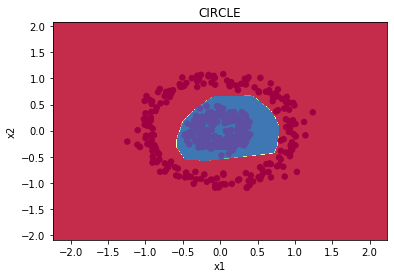

In [42]:
# loading the predictions to numpy array
Circle_Pred = []
with open("CIRCLES/Y_PREDICTS.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        Circle_Pred.append(float(row[0]))
Circle_Pred = np.array(Circle_Pred)
plot_decision_boundary(Circle_Pred,X_CIRCLES,Y_CIRCLES,"CIRCLE")

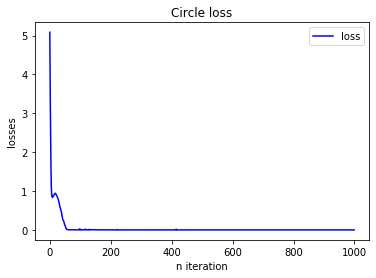

In [43]:
Circle_loss = []
with open("CIRCLES/CIRCLES_losses.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        Circle_loss.append(float(row[0]))
Circle_loss = np.array(Circle_loss)
plot_loss(range(len(Circle_loss)),Circle_loss,"Circle loss")

## Plots of Flowers

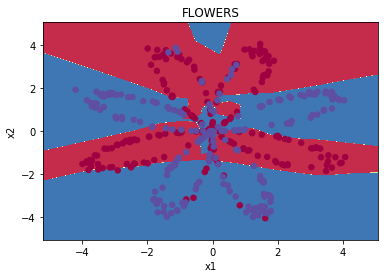

In [44]:
# loading the predictions to numpy array
Flowers_pred = []
with open("FLOWERS/Y_PREDICTS.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        Flowers_pred.append(float(row[0]))
Flowers_pred = np.array(Flowers_pred)
plot_decision_boundary(Flowers_pred,X_FLOWERS,Y_FLOWERS,"FLOWERS")

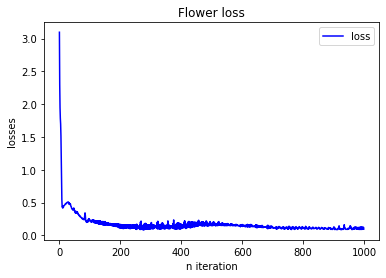

In [45]:
FLower_loss = []
with open("FLOWERS/FLOWERS_losses.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        FLower_loss.append(float(row[0]))
FLower_loss = np.array(FLower_loss)
plot_loss(range(len(FLower_loss)),FLower_loss,"Flower loss")

## Plots of Gaus

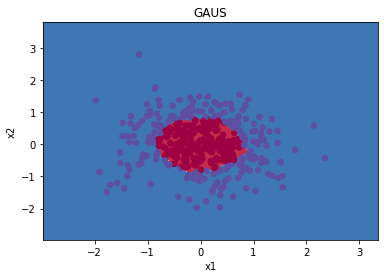

In [46]:
# loading the predictions to numpy array
Gaus_preds = []
with open("GAUS/Y_PREDICTS.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        Gaus_preds.append(float(row[0]))
Gaus_preds = np.array(Gaus_preds)
plot_decision_boundary(Gaus_preds,X_GAUS,Y_GAUS,"GAUS")

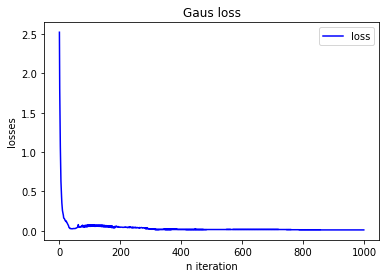

In [47]:
GAUS_loss = []
with open("GAUS/GAUS_losses.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        GAUS_loss.append(float(row[0]))
GAUS_loss = np.array(GAUS_loss)
plot_loss(range(len(GAUS_loss)),GAUS_loss,"Gaus loss")

## Plots of Moons

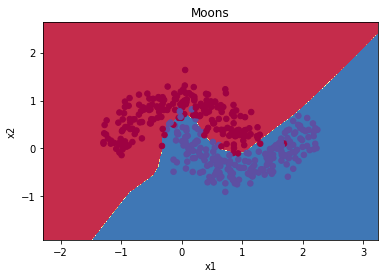

In [48]:
Moons_pred = []
with open("Moons/Y_PREDICTS.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        Moons_pred.append(float(row[0]))
Moons_pred = np.array(Moons_pred)
plot_decision_boundary(Moons_pred,X_MOONS,Y_MOONS,"Moons")

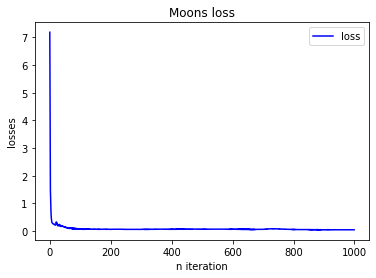

In [49]:
Moons_loss = []
with open("MOONS/Moons_losses.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        Moons_loss.append(float(row[0]))
Moons_loss = np.array(Moons_loss)
plot_loss(range(len(Moons_loss)),Moons_loss,"Moons loss")